In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import pandas as pd

In [2]:
#数据加载
(image_train, label_train),\
(image_test, label_test) = mnist.load_data()

In [3]:
print('train data shape: ', image_train.shape)
print('train label shape: ', label_train.shape)
print('test data shape: ', image_test.shape)
print('test data shape: ', label_test.shape)

train data shape:  (60000, 28, 28)
train label shape:  (60000,)
test data shape:  (10000, 28, 28)
test data shape:  (10000,)


In [4]:
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='Greys')

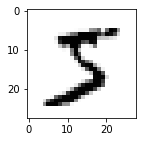

In [5]:
plot_image(image_train[0])

In [6]:
def plot_images_labels_predictions(images, labels, predictions, index_start, num = 10):
    index = index_start
    fig = plt.gcf()
    fig.set_size_inches(10, 12)
    for i in range(num):
        plt_sub = plt.subplot(5, 5, i+1)
        plt_sub.imshow(images[index], cmap='binary')
        title = 'label=' + str( labels[index] )
        if len(predictions) > 0:
            title += ', pred=' + str(predictions[index])
        plt_sub.set_title(title, fontsize=10)
        plt_sub.set_xticks([])
        plt_sub.set_yticks([])
        index += 1

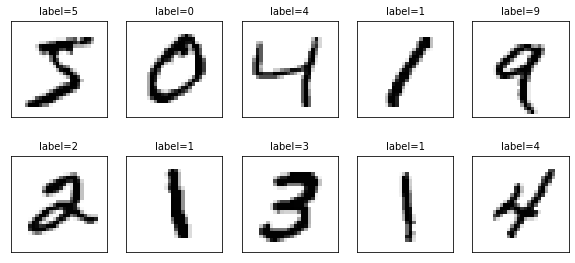

In [7]:
plot_images_labels_predictions(image_train, label_train, [], 0)

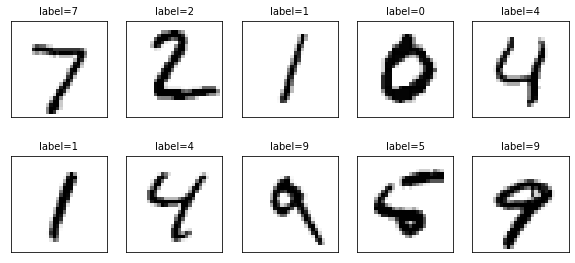

In [8]:
plot_images_labels_predictions(image_test, label_test, [], 0)

In [9]:
# 数据平坦化
#image_train_flat = image_train.reshape(-1, 784)
#image_test_flat = image_test.reshape(-1, 784)

In [11]:
#数据归一化
image_train_normalize = image_train / 255
image_test_normalize = image_test / 255

In [12]:
image_train_normalize = image_train_normalize.reshape(-1, 28, 28, 1)
image_test_normalize = image_test_normalize.reshape(-1, 28, 28, 1)

In [13]:
# One hot
print(label_train[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [14]:
label_train_onehot = keras.utils.to_categorical(label_train)
label_test_onehot = keras.utils.to_categorical(label_test)
print(label_train_onehot[0:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [16]:
# Create Model
# LeNet-5
# Conv Pooling, Conv Pooling, Full connect, output(softmax)
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5),padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.AlphaDropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', input_shape=(784,)), 
    keras.layers.AlphaDropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

#relu: max(0, x)
# softmax: 将向量变成概率分布 y = [e^x1/sum, e^x2/sum, e^x3/sum] -> [y1, y2, y3]
# sum = e^x1 + e^x2 + e^x3
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
alpha_dropout (AlphaDropout) (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [17]:
# Compile model
# sparse_categorical_crossentropy ?
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['categorical_accuracy'])

In [18]:
# Train
history = model.fit(image_train_normalize, label_train_onehot,
                    validation_split = 0.1, epochs=30, batch_size=200, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 - 6s - loss: 0.8111 - categorical_accuracy: 0.7366 - val_loss: 0.1339 - val_categorical_accuracy: 0.9727
Epoch 2/30
54000/54000 - 2s - loss: 0.1771 - categorical_accuracy: 0.9446 - val_loss: 0.0928 - val_categorical_accuracy: 0.9790
Epoch 3/30
54000/54000 - 2s - loss: 0.1227 - categorical_accuracy: 0.9616 - val_loss: 0.0816 - val_categorical_accuracy: 0.9828
Epoch 4/30
54000/54000 - 2s - loss: 0.0968 - categorical_accuracy: 0.9697 - val_loss: 0.0813 - val_categorical_accuracy: 0.9867
Epoch 5/30
54000/54000 - 2s - loss: 0.0844 - categorical_accuracy: 0.9739 - val_loss: 0.0685 - val_categorical_accuracy: 0.9878
Epoch 6/30
54000/54000 - 2s - loss: 0.0730 - categorical_accuracy: 0.9772 - val_loss: 0.0706 - val_categorical_accuracy: 0.9880
Epoch 7/30
54000/54000 - 2s - loss: 0.0630 - categorical_accuracy: 0.9808 - val_loss: 0.0586 - val_categorical_accuracy: 0.9907
Epoch 8/30
54000/54000 - 2s - loss: 0.0562 - categorica

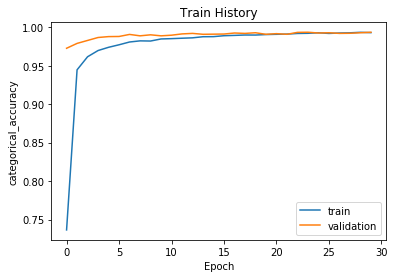

In [19]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='best')

show_train_history(history, 'categorical_accuracy','val_categorical_accuracy')  

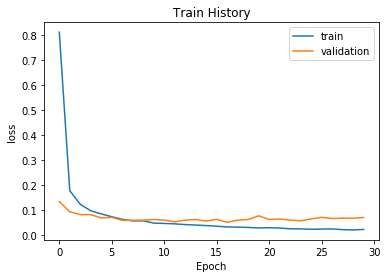

In [20]:
show_train_history(history, 'loss', 'val_loss')

In [21]:
model.evaluate(image_test_normalize, label_test_onehot, verbose=2)

10000/1 - 1s - loss: 0.0239 - categorical_accuracy: 0.9927


[0.04789164231824603, 0.9927]

In [22]:
#Predict
pred = model.predict_classes(image_test_normalize)

In [23]:
print(pred[0:10])

[7 2 1 0 4 1 4 9 5 9]


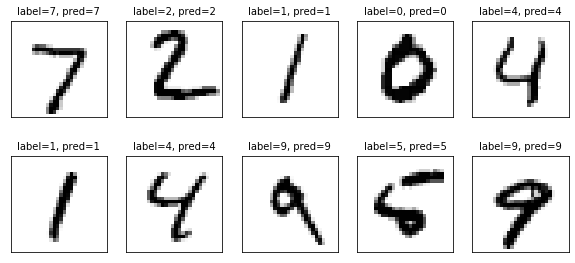

In [24]:
plot_images_labels_predictions(image_test, label_test, pred, index_start=0)

In [25]:
#错误数据分析
pd.crosstab(label_test, pred, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,0,1,0,0,0,2,3,1,0
1,0,1131,0,0,0,0,1,2,1,0
2,0,1,1026,0,0,0,1,4,0,0
3,0,0,3,1002,0,1,0,1,2,1
4,0,0,0,0,976,0,1,1,0,4
5,1,0,0,3,0,884,1,1,0,2
6,1,2,0,0,0,2,952,0,1,0
7,0,1,4,0,0,0,0,1021,1,1
8,1,0,1,1,1,1,0,1,964,4


In [26]:
df = pd.DataFrame({'label':label_test, 'predict':pred})
df[:10]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [27]:
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2597,5,3
5937,5,3


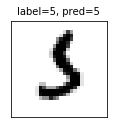

In [28]:
plot_images_labels_predictions(image_test, label_test, pred, index_start=340, num=1)

In [29]:
df[(df.label==9)&(df.predict==4)]

,label,predict
1901,9,4
3869,9,4
3985,9,4
4823,9,4


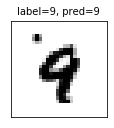

In [30]:
plot_images_labels_predictions(image_test, label_test, pred, index_start=9587, num=1)